In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os

collab_datadir = "/content/drive/MyDrive/CS 410 - Project/CS 410 - Codebase for Report (Dataset Analysis)"
if os.path.exists(collab_datadir):
  os.chdir(collab_datadir)

!pwd

/content/drive/.shortcut-targets-by-id/1D6k6NaYmoa4Jo28jhmhNMJlL0fFZ-fvO/CS 410 - Project/CS 410 - Codebase for Report (Dataset Analysis)


In [ ]:
# Necessary import statements
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Hotel Reviews in a DataFrame
hotel_df = pd.read_csv('Hotel_Reviews.csv')
hotel_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
# Viewing DataFrame Columns
hotel_df_col = hotel_df.columns.tolist()
hotel_df_col

['Hotel_Address',
 'Additional_Number_of_Scoring',
 'Review_Date',
 'Average_Score',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Positive_Review',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'Tags',
 'days_since_review',
 'lat',
 'lng']

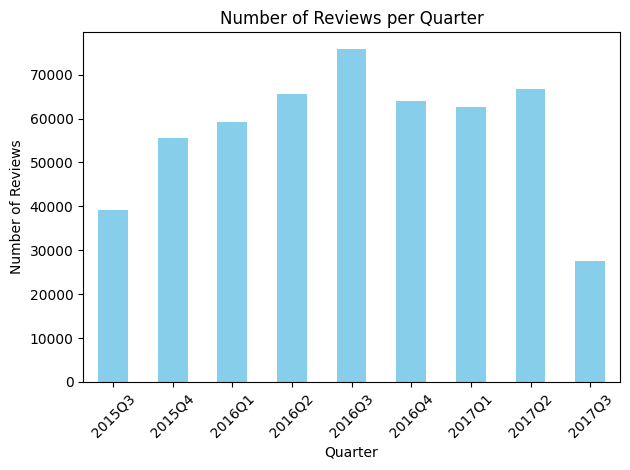

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Review_Date to datetime format
hotel_df['Review_Date'] = pd.to_datetime(hotel_df['Review_Date'])

# Extract quarter and year from datetime
hotel_df['quarter'] = hotel_df['Review_Date'].dt.to_period('Q')
hotel_df['date'] = hotel_df['Review_Date'].dt.date

# Count the number of entries per quarter
quarterly_counts = hotel_df.groupby('quarter').size()

# Plot the data
quarterly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Quarter')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


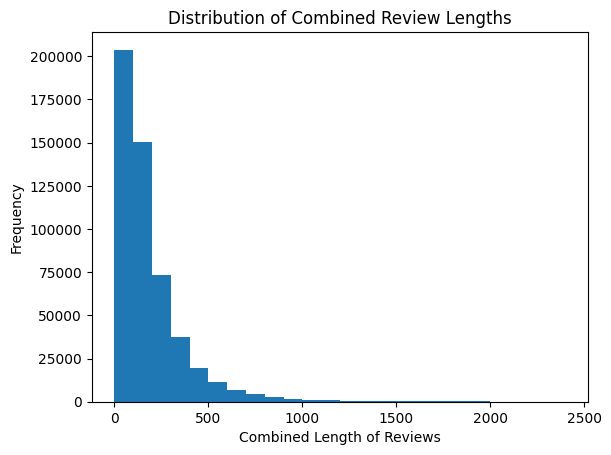

In [ ]:
# Distribution for length of (combined) reviews

combined_review_length = hotel_df['Positive_Review'].apply(len) + hotel_df['Negative_Review'].apply(len)

# Plot the distribution of combined lengths
bin_edges = [100*i for i in range(25)]
plt.hist(combined_review_length, bins=bin_edges)
plt.xlabel('Combined Length of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Combined Review Lengths')
plt.show()

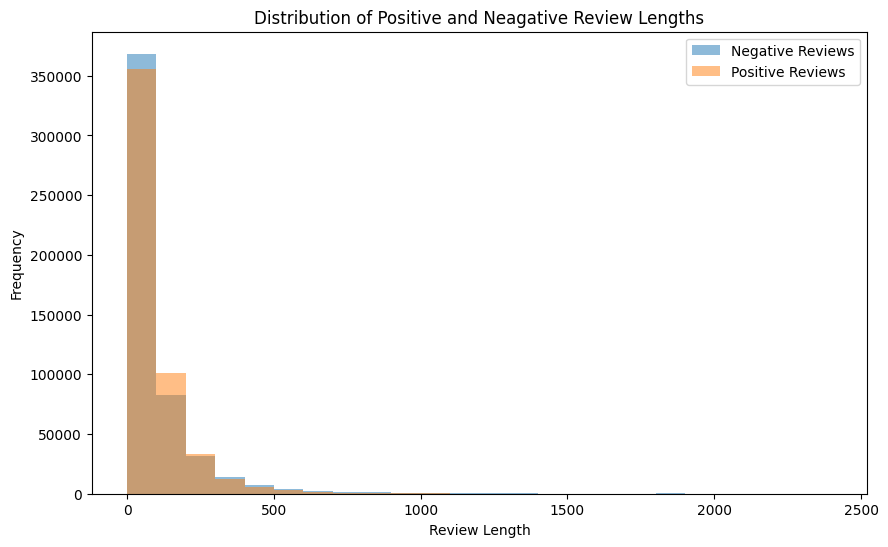

In [ ]:
# Length of positive reviews vs. Length of negative reviews

plt.figure(figsize=(10, 6))
bin_edges = [100*i for i in range(25)]
plt.hist(hotel_df['Negative_Review'].str.len(), bins=bin_edges, alpha=0.5, label='Negative Reviews')
plt.hist(hotel_df['Positive_Review'].str.len(), bins=bin_edges, alpha=0.5, label='Positive Reviews')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Neagative Review Lengths')
plt.legend()
plt.show()

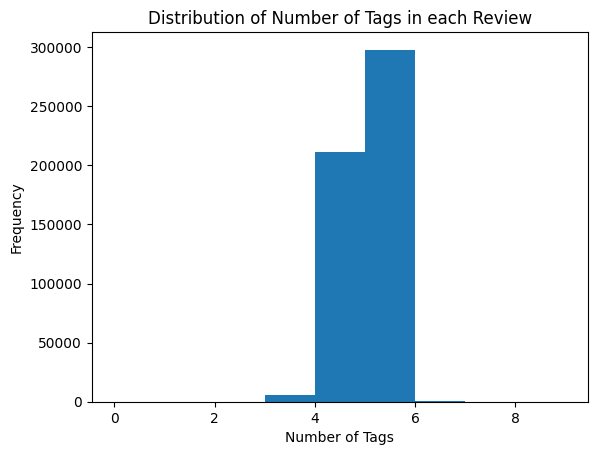

In [ ]:
# Distribution of number of tags
# Distribution of number of tags
import ast

tags_length = hotel_df['Tags'].apply(lambda x: len(ast.literal_eval(x)))

# # Plot the distribution of combined lengths
bin_edges = [i for i in range(10)]
plt.hist(tags_length, bins=bin_edges)
plt.xlabel('Number of Tags')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Tags in each Review')
plt.show()